# Loading packages

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Data


For this pertucular problem, we have two csv files 1) dataset for training and 2) dataset for testing. we will load both dataset accordingly.

In [3]:
Train=pd.read_csv("train_ctrUa4K.csv")
Test=pd.read_csv("test_lAUu6dG.csv")

Lets make the copy of this dataset so that even if we make changes in new dataset, we still have our original dataset.

In [4]:
Train_original=Train.copy()
Test_original=Test.copy()

Now, lets check the colulmn name of both the dataset and their types

In [5]:
Train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [6]:
Test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [7]:
Train.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [8]:
Test.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome      int64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
dtype: object

We can see that there are 3 major data types : Categorical, int64 and float64

Now lets check dimensions of both dataset.


In [9]:
Train.shape , Test.shape

((614, 13), (367, 12))

We can clearly see that our train dataset is larger that our test dataset.

# Univariate Analysis

Univariate analysis explores each variable in a data set, separately. It looks at the range of values, as well as the central tendency of the values. It describes the pattern of response to the variable. It describes each variable on its own. Descriptive statistics describe and summarize data.

First of all, we will explore our target variable which is Loan_Status and it is a categorical variable.Hence, barchart will be best plot to understand variable.

In [10]:
Train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

<AxesSubplot:>

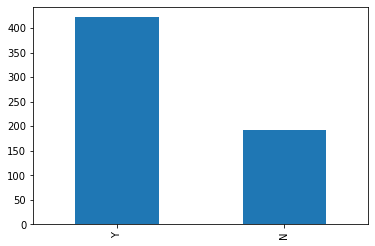

In [11]:
Train['Loan_Status'].value_counts().plot.bar()

We can see that more than 400 people had their loan approved while around 200 people's loan was not approved.

Now, lets understand variable saperately according to their data types.

Categorical variable :

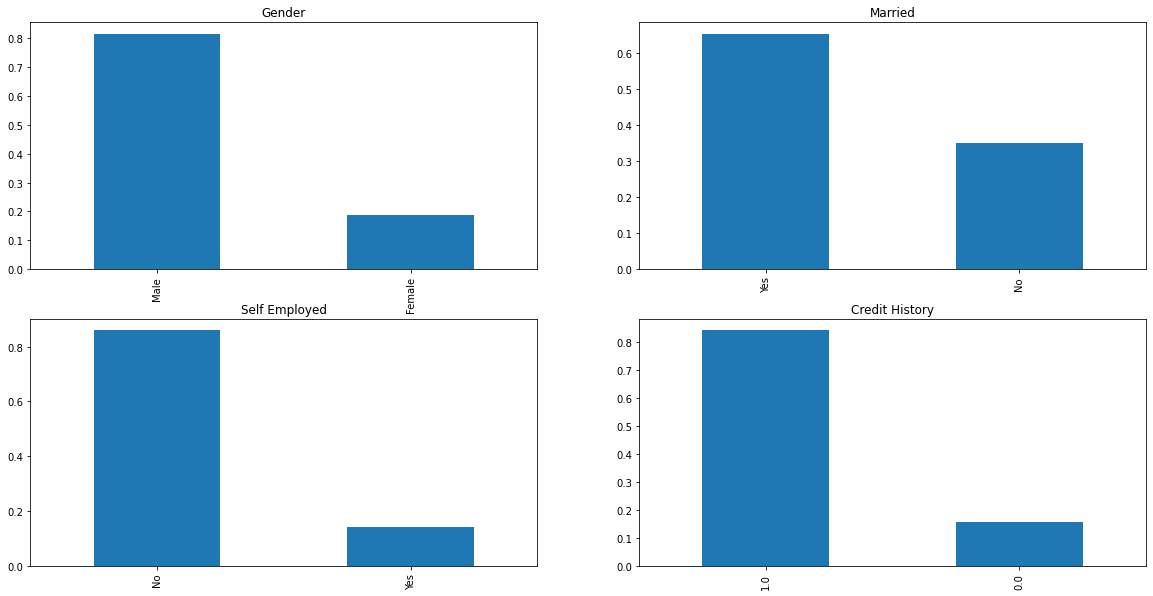

In [12]:
plt.figure(1) , plt.subplot(221)

Train['Gender'].value_counts (normalize=True). plot.bar(figsize=(20,10),

title= 'Gender')

plt.subplot(222)

Train[ 'Married'].value_counts (normalize=True). plot.bar (title= 'Married')

plt.subplot(223)

Train[ 'Self_Employed'].value_counts (normalize=True). plot.bar(title=

'Self Employed')

plt.subplot(224)

Train['Credit_History'].value_counts (normalize=True). plot.bar(title=

'Credit History')

plt.show()

It can be inferred from the above bar plots that:

• 80% applicants in the dataset are male.

• Around 65% of the applicants in the dataset are married.

• Around 15% applicants in the dataset are self employed.

• Around 85% applicants have repaid their debts.

Now let's visualize the ordinal variables.

Independent Variable (Ordinal):

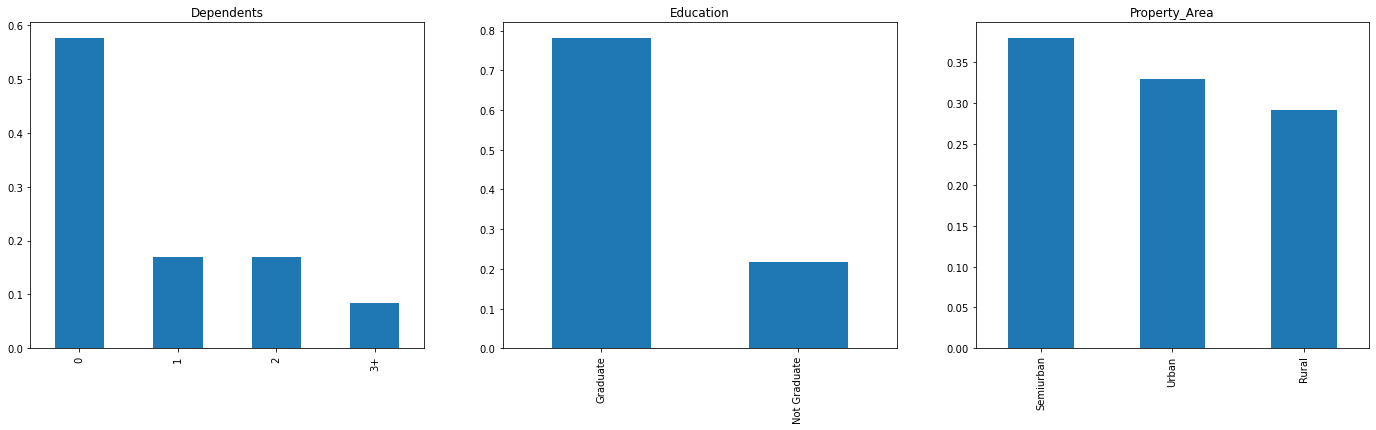

In [13]:
plt.figure(1) , plt.subplot(131) 

Train[ 'Dependents'].value_counts (normalize=True).plot.bar(figsize=(24,6),title='Dependents')
plt.subplot(132)
Train['Education'].value_counts (normalize=True).plot.bar(title='Education')
plt.subplot(133)
Train['Property_Area'].value_counts(normalize=True).plot.bar(title="Property_Area")
plt.show()

Following inferences can be made from the above bar plots:

-Most of the applicants don't have any dependents. 

-Around 80% of the applicants are Graduate.

-Most of the applicants are from Semiurban area.

Independent Variable (Numerical) :


Till now we have seen the categorical and ordinal variables and now lets visualize the numerical variables. Lets look at the distribution of Applicant income first.

C:\Users\MEETS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


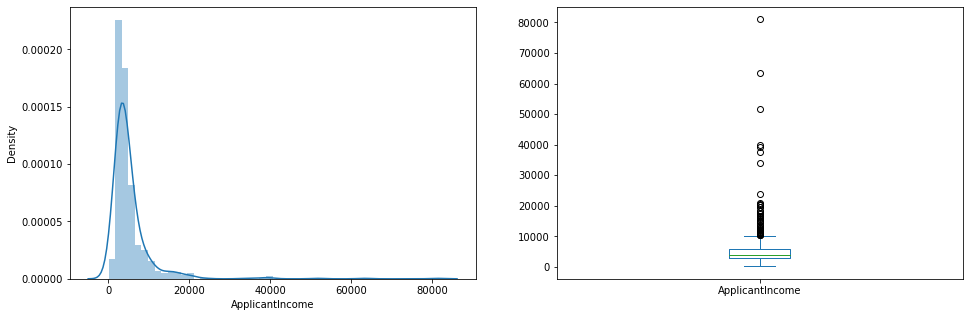

In [14]:
plt.figure(1) , plt.subplot(121) 
sns.distplot (Train['ApplicantIncome']); 
plt.subplot(122) 
Train[ 'ApplicantIncome'].plot.box (figsize=(16,5)) 
plt.show()

It can be inferred that most of the data in the distribution of applicant income is towards left which means it is not normally distributed. We will try to make it normal in later sections as algorithms works better if the data is normally distributed.

The boxplot confirms the presence of a lot of outliers/extreme values. This can be attributed to the income disparity in the society. Part of this can be driven by the fact that we are looking at people with different education levels. 

Let us segregate them by Education:

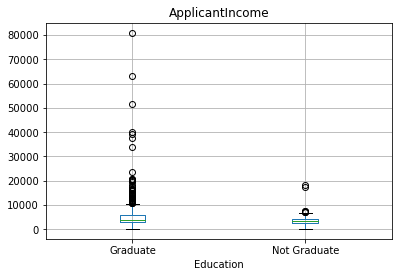

In [15]:
Train.boxplot(column='ApplicantIncome', by='Education')
plt.suptitle("")  # This line sets the title to an empty string
plt.show()  # This line displays the boxplot


Now we would like to know how well each feature correlate with Loan Status. So, in the next section we will look at bivariate analysis.

# Bivariate Analysis

Lets recall some of the hypotheses that we generated earlier:

• Applicants with high income should have more chances of loan approval.

• Applicants who have repaid their previous debts should have higher chances of loan approval.

• Loan approval should also depend on the loan amount. If the loan amount is less, chances of loan approval should be high.

• Lesser the amount to be paid monthly to repay the loan, higher the chances of loan approval.

Lets try to test the above mentioned hypotheses using bivariate analysis

After looking at every variable individually in univariate analysis, we will now explore them again with respect to the target variable.

### Categorical Independent Variable VS Target Variable

First of all we will find the relation between target variable and categorical independent variables. Let us look at the stacked bar plot now which will give us the proportion of approved and unapproved loans.


<AxesSubplot:xlabel='Gender'>

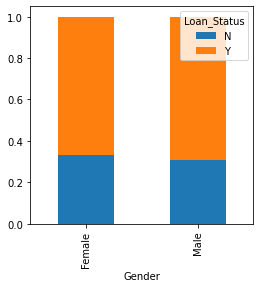

In [16]:
Gender=pd.crosstab(Train['Gender'], Train['Loan_Status']) 
Gender.div(Gender.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4))

It can be inferred that the proportion of male and female applicants is more or less same for both approved and unapproved loans.

Now let us visualize the remaining categorical variables vs target variable.

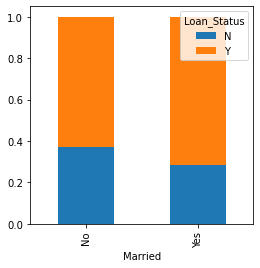

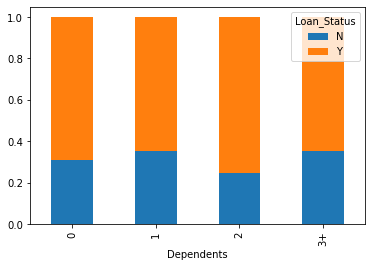

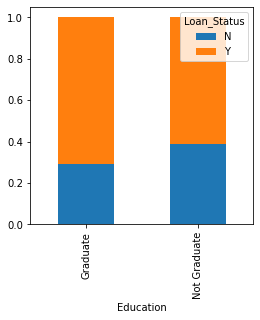

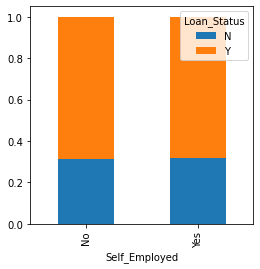

In [17]:
Married=pd.crosstab(Train['Married'], Train[ 'Loan_Status'])

Dependents=pd.crosstab(Train[ 'Dependents'], Train['Loan_Status'])

Education=pd.crosstab(Train[ 'Education'], Train['Loan_Status'])

Self_Employed=pd.crosstab(Train [ 'Self_Employed' ], Train['Loan_Status'])

Married.div(Married.sum (1).astype (float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

Dependents.div(Dependents. sum(1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

Education.div(Education.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

Self_Employed.div(Self_Employed. sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show()

-Proportion of married applicants is higher for the approved loans.

-Distribution of applicants with 1 or 3+ dependents is similar across both the categories of Loan_Status.

-There is nothing significant we can infer from Self Employed vs Loan_Status plot.

Now we will look at the relationship between remaining categorical independent variables and Loan_Status.

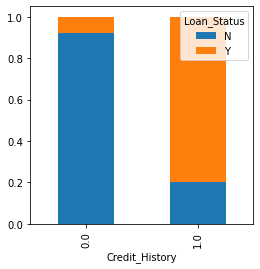

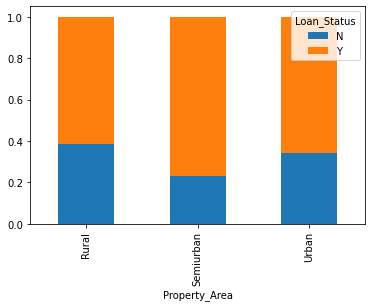

In [18]:
Credit_History=pd.crosstab(Train[ 'Credit_History'], Train['Loan_Status'])

Property_Area=pd.crosstab(Train['Property_Area'], Train['Loan_Status']) 
Credit_History.div(Credit_History.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(4,4)) 
plt.show() 
Property_Area.div(Property_Area.sum (1).astype(float), axis=0).plot(kind="bar", stacked=True) 
plt.show()

After exploring all the variables in our data, we can now impute the missing values and treat the outliers because missing data and outliers can have adverse effect on the model performance.

# Missing value imputation

Let's list out feature-wise count of missing values.

In [19]:
Train.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

There are missing values in Gender, Married, Dependents, Self Employed, LoanAmount, Loan Amount Term and Credit History features.We will treat the missing values in all the features one by one.

We can consider these methods to fill the missing values:

• For numerical variables: imputation using mean or median

• For categorical variables: imputation using mode

There are very less missing values in Gender, Married, Dependents, Credit_History and Self Employed features so we can fill them using the mode of the features.

In [20]:
Train['Gender'].fillna(Train['Gender'].mode()[0], inplace=True) 
Train[ 'Married'].fillna(Train[ 'Married'].mode()[0], inplace=True) 
Train['Dependents'].fillna (Train[ 'Dependents'].mode()[0], inplace=True) 
Train[ 'Self_Employed'].fillna(Train['Self_Employed'].mode()[0], inplace=True) 
Train['Credit_History'].fillna(Train[ 'Credit_History'].mode() [0], inplace=True)

Now let's try to find a way to fill the missing values in Loan Amount Term. We will look at the value count of the Loan amount term variable.

In [21]:
Train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

It can be seen that in loan amount term variable, the value of 360 is repeating the most. So we will replace the missing values in this variable using the mode of this variable.

In [22]:
Train['Loan_Amount_Term'].fillna(Train['Loan_Amount_Term'].mode()[0], inplace=True)

Now we will see the LoanAmount variable. As it is a numerical variable, we can use mean or median to impute the missing values. We will use median to fill the null values as earlier we saw that loan amount have outliers so the mean will not be the proper approach as it is highly affected by the presence of outliers.

In [23]:
Train['LoanAmount'].fillna(Train[ 'LoanAmount'].median(), inplace=True)

Now lets check whether all the missing values are filled in the dataset.



In [24]:
Train.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Outlier Treatment

As we saw earlier in univariate analysis, LoanAmount contains outliers so we have to treat them as the presence of outliers affects the distribution of the data. Let's examine what can happen to a data set with outliers. For the sample data set:
1, 1, 2, 2, 2, 2, 3, 3, 3, 4,4

We find the following: mean, median, mode, and standard deviation :
Mean = 2.58
Median = 2.5
Mode = 2
Standard Deviation = 1.08

If we add an outlier to the data set:
1.1.2.2.2, 2, 3, 3, 3, 4, 4, 400. 
The new values of our statistics are:
Mean = 35.38
Median = 2.5
Mode = 2
Standard Deviation = 114.74

It can be seen that having outliers often has a significant effect on the mean and standard deviation and hence affecting the distribution. We must take steps to remove outliers from our data sets.Due to these outliers bulk of the data in the loan amount is at the left and the right tail is longer.

This is called right skewness. One way to remove the skewness is by doing the log transformation. As we take the log transformation, it does not affect the smaller values much,but reduces the larger values. So, we get a distribution similar to normal distribution.

Let's visualize the effect of log transformation. We will do the similar changes to the test file simultaneously.

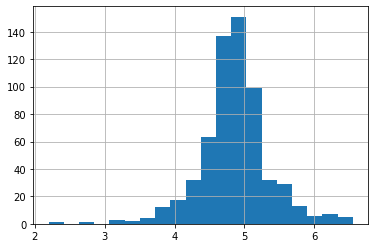

In [25]:
Train['LoanAmount_log'] =np.log(Train['LoanAmount'])

Train[ 'LoanAmount_log'].hist (bins=20) 
Test['LoanAmount_log'] =np.log(Test['LoanAmount'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's build a logistic regression model and make predictions for the test dataset.

# Model Building : Part 1

Let us make our first model to predict the target variable. We will start with Logistic Regression which is used for predicting binary outcome.

• Logistic Regression is a classification algorithm. It is used to predict a binary outcome (1/ 0. Yes/No, True/False) given a set of independent variables.

Logistic regression is an estimation of Logit function. Logit function is simply a log of odds in favor of the event.

• This function creates a s-shaped curve with the probability estimate, which is very similar to the required step wise function

Lets drop the Loan_ID variable as it do not have any effect on the loan status. We will do the same changes to the test dataset which we did for the training dataset.


In [26]:
Train=Train.drop("Loan_ID",axis=1) 
Test=Test.drop("Loan_ID", axis=1)



We will use scikit-learn (sklearn) for making different models which is an open source library for Python. It is one of the most efficient tool which contains many Inbuilt functions that can be used for modeling in Python,

Sklearn requires the target variable in a separate dataset. So, we will drop our target variable from the train dataset and save it in another dataset.


In [27]:
X=Train.drop('Loan_Status',1) 
y = Train.Loan_Status

C:\Users\MEETS\AppData\Local\Temp\ipykernel_6308\928103247.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X=Train.drop('Loan_Status',1)


Now we will make dummy variables for the categorical variables. Dummy variable turns categorical variables into a series of 0 and 1, making them lot easier to quantify and compare. Let us understand the process of dummies first:

• Consider the "Gender" variable. It has two classes, Male and Female.

• As logistic regression takes only the numerical values as input, we have to change male and female into numerical value.

Once we apply dummies to this variable, it will convert the "Gender" variable into two variables(Gender Male and Gender_Female), one for each class, I.e. Male and Female.

• Gender Male will have a value of Oif the gender is Female and a value of 1 if the gender is Male.

In [28]:
X=pd.get_dummies(X) 
Train=pd.get_dummies(Train)
Test=pd.get_dummies(Test)

Now we will train the model on training dataset and make predictions for the test dataset. But can we validate these predictions? One way of doing this is we can divide our train dataset into two parts: train and validation. We can train the model on this train part and using that make predictions for the validation part. In this way we can validate our predictions as we have the true predictions for the validation part (which we do not have for the test dataset).

We will use the train_test_split function from sklearn to divide our train dataset. So, first let us import train_test_split.

from sklearn.model_selection import train_test_split


In [29]:
from sklearn.model_selection import train_test_split
x_train, x_cv, y_train, y_cv = train_test_split(X,y, test_size=0.3)

The dataset has been divided into training and validation part. Let us import LogisticRegression and accuracy score from sklearn and fit the logistic regression model.


In [30]:
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score

model=LogisticRegression() 
model.fit(x_train, y_train)

C:\Users\MEETS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [31]:
model = LogisticRegression(
    C=1.0,
    class_weight=None,
    dual=False,
    fit_intercept=True,
    max_iter=100,
    multi_class='ovr',
    n_jobs=1,
    solver='liblinear',
    tol=0.0001,
    penalty='l2',  # Corrected '12' to 'l2' as the penalty type
    random_state=1,
    verbose=0,
    warm_start=False
)


Here the C parameter represents inverse of regularization strength. Regularization is applying a penalty to increasing the magnitude of parameter values in order to reduce overfitting. Smaller values of C specify stronger regularization.

Let's predict the Loan_Status for validation set and calculate its accuracy.


In [32]:
model.fit(x_train, y_train)
pred_cv= model.predict(x_cv)


Let us calculate how accurate our predictions are by calculating the accuracy.



In [33]:
accuracy = accuracy_score(y_cv, pred_cv)
accuracy

0.7891891891891892

So our predictions are more than 80% , i.e. we have identified 80% of the loan status correctly.Let's make predictions for the test dataset.


In [34]:
# Assuming 'test' is your test data
has_nan = Test.isna().any().any()
if has_nan:
     Test.dropna(inplace=True) 
        
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
Test_scaled = scaler.fit_transform(Test)

# Make predictions on the test set
y_pred = model.predict(x_cv)

# Calculate the accuracy for the test set as a percentage
test_accuracy = accuracy_score(y_cv, y_pred) * 100
test_accuracy

78.91891891891892

# Feature Engineering

Based on the domain knowledge, we can come up with new features that might affect the target variable. We will create the following three new features:

--> Total Income = As discussed during bivariate analysis we will combine the Applicant Income and Coapplicant Income. If the total income is high, chances of loan approval might also be high.

-->EMI = EMI is the monthly amount to be paid by the applicant to repay the loan. Idea behind making this variable is that people who have high EMI's might find it difficult to pay back the loan. We can calculate the EMI by taking the ratio of loan amount with respect to loan amount term.

--> Balance Income = This is the income left after the EMI has been paid. Idea behind creating this variable is that if this value is high, the chances are high that a person will repay the loan and hence increasing the chances of loan approval.



C:\Users\MEETS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


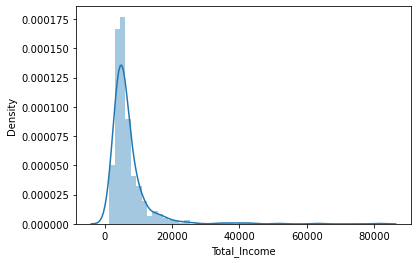

In [35]:
Train['Total_Income']=Train['ApplicantIncome']+Train['CoapplicantIncome'] 
Test['Total_Income']=Test['ApplicantIncome']+Test['CoapplicantIncome']
sns.distplot(Train['Total_Income']);

We can see it is shifted towards left, i.e., the distribution is right skewed. So, let's take the log transformation to make the distribution normal.

C:\Users\MEETS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


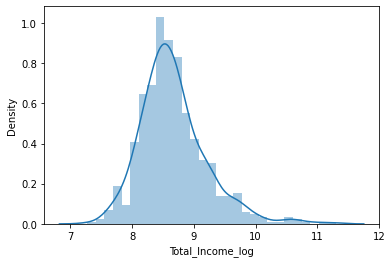

In [36]:
Train[ 'Total_Income_log']=np.log(Train['Total_Income']) 
sns.distplot(Train[ 'Total_Income_log'])
Test['Total_Income_log']=np.log(Test['Total_Income'])

Now the distribution looks much closer to normal and effect of extreme values has been significantly subsided. Let's create the EMI feature now.


C:\Users\MEETS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


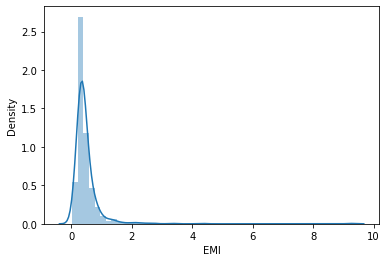

In [37]:
Train['EMI']=Train [ 'LoanAmount']/Train['Loan_Amount_Term'] 
Test['EMI']=Test['LoanAmount']/Test['Loan_Amount_Term']
sns.distplot(Train['EMI']);

Let us create Balance Income feature now and check its distribution.

C:\Users\MEETS\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


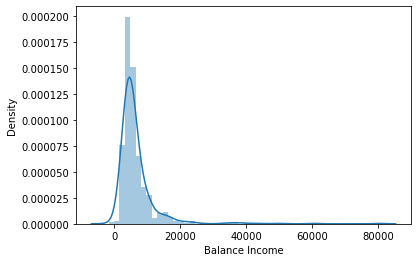

In [38]:
Train[ 'Balance Income']=Train['Total_Income'] - (Train['EMI']*1000) # Multiply with 1000 to make the units equal test['Balance Income']=test['Total_Income']-(test['EMI' ]*1000)
sns.distplot(Train [ 'Balance Income']);

Let us now drop the variables which we used to create these new features. Reason for doing this is, the correlation between those old features and these new features will be very high and logistic regression assumes that the variables are not highly correlated. We also wants to remove the noise from the dataset, so removing correlated features will help in reducing the noise too.

In [39]:
Train=Train.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1) 
Test=Test.drop(['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term'], axis=1)

# Model Building : Part 2

After creating new features, we can continue the model building process. So we will start with logistic regression model and then move over ot RandomForest.

Let's prepare the data for feeding into the models

### Logistic Regression

In [58]:
from sklearn.model_selection import StratifiedKFold

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
scores = []  # To store accuracy scores

for train_index, test_index in kf.split(X, y):
    print('\nFold {} of {} K-Folds'.format(i, kf.n_splits))
    x_train, x_val = X.loc[train_index], X.loc[test_index]
    y_train, y_val = y[train_index], y[test_index]
    
    model = LogisticRegression(random_state=1)
    model.fit(x_train, y_train)
    
    pred_val = model.predict(x_val)
    score = accuracy_score(y_val, pred_val)
    scores.append(score)
    
    print('Accuracy score:', score)
    i += 1

average_score = np.mean(scores)
print('\nAverage accuracy score across all folds:', average_score)

# Assuming you want to predict using the model on a 'Test' dataset
pred_test = model.predict(Test)
pred_proba = model.predict_proba(x_val)[:, 1]



Fold 1 of 5 K-Folds
Accuracy score: 0.8048780487804879

Fold 2 of 5 K-Folds
Accuracy score: 0.8373983739837398

Fold 3 of 5 K-Folds
Accuracy score: 0.7804878048780488

Fold 4 of 5 K-Folds
Accuracy score: 0.7886178861788617

Fold 5 of 5 K-Folds
Accuracy score: 0.7950819672131147

Average accuracy score across all folds: 0.8012928162068507


C:\Users\MEETS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\MEETS\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

ValueError: X has 20 features, but LogisticRegression is expecting 21 features as input.

The mean validation accuracy for this model is 0.812

### Random forest

-RandomForest is a tree based bootstrapping algorithm wherein a certain no. of weak learners (decision trees) are combined to make a powerful prediction model.

-For every individual learner, a random sample of rows and a few randomly chosen variables are used to build a decision tree model.

-Final prediction can be a function of all the predictions made by the individual learners.

-In case of regression problem, the final prediction can be mean of all the predictions.

In [61]:
from sklearn.model_selection import StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

i = 1
kf = StratifiedKFold(n_splits=5, random_state=1, shuffle=True)
scores = []  # To store accuracy scores

for Train_index, Test_index in kf.split(X, y):
    print('\nFold {} of {}'.format(i, kf.n_splits))
    
    xtr, xvl = X.loc[Train_index], X.loc[Test_index]
    ytr, yvl = y[Train_index], y[Test_index]
    
    model = RandomForestClassifier(random_state=1, max_depth=10)
    model.fit(xtr, ytr)
    
    pred_Test = model.predict(xvl)
    score = accuracy_score(yvl, pred_Test)
    
    scores.append(score)
    print('Accuracy score:', score)
    
    i += 1

# Calculate and print the average accuracy score across all folds
average_score = sum(scores) / len(scores)
print('\nAverage validation accuracy score:', average_score)




Fold 1 of 5
Accuracy score: 0.8130081300813008

Fold 2 of 5
Accuracy score: 0.8373983739837398

Fold 3 of 5
Accuracy score: 0.7804878048780488

Fold 4 of 5
Accuracy score: 0.8130081300813008

Fold 5 of 5
Accuracy score: 0.7622950819672131

Average validation accuracy score: 0.8012395041983206


The mean validation accuracy for this model is 0.801

Here, we can use Logistic regression model as it seems slight better than Random Forest for this case.